# Temperature variability in Ann Arbor, Michigan, USA

Record high and record low temperatures by day of the year over the period 2005-2014. The area between the record high and record low temperatures for each day is shaded. For 2015 only, daily temperatures which exceed record highs or lows are marked by the overlaid scatter plot. 

Note: The data for this assignment comes from a subset of The National Centers for Environmental Information (NCEI) [Daily Global Historical Climatology Network](https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/readme.txt) (GHCN-Daily). The GHCN-Daily is comprised of daily climate records from thousands of land surface stations across the globe.


/opt/conda/lib/python3.6/site-packages/ipykernel/__main__.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/conda/lib/python3.6/site-packages/ipykernel/__main__.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


<IPython.core.display.Javascript object>


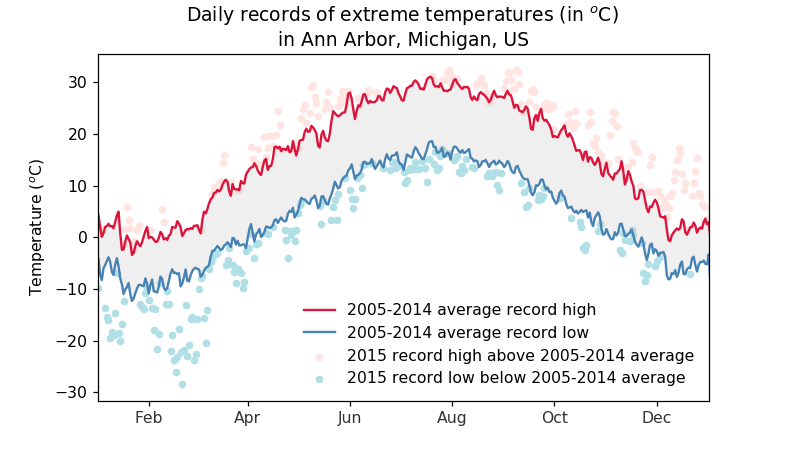

In [163]:
import matplotlib.pyplot as plt
import mplleaflet
import pandas as pd
import numpy as np
import datetime as dt

%matplotlib notebook

df = pd.read_csv('data/C2A2_data/BinnedCsvs_d400/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv')
df['Date'] = pd.to_datetime(df['Date'])
df=df.sort_values(by='Date')
df['DOY']=df['Date'].apply(lambda x: x.timetuple().tm_yday)
df=df.set_index('Date')
df['Data_Value']=df['Data_Value']/10

df1=df[df.index.year<2014]
df1=df1.reset_index()
df1=df1.pivot_table(values='Data_Value',index='DOY',columns='Element', aggfunc=[np.mean])
df1.columns = df1.columns.droplevel()
df1=df1.reset_index(0).reset_index(drop=True)

df2=df[df.index.year==2015]
df2=df2.reset_index()
df2=df2.pivot_table(values='Data_Value',index='DOY',columns='Element', aggfunc=[np.mean])
df2.columns = df2.columns.droplevel()
df2=df2.reset_index(0).reset_index(drop=True)
df2['Tmax_extreme']=df2['TMAX']
df2['Tmin_extreme']=df2['TMIN']
df2['Tmax_extreme'][pd.Series(df2['TMAX']-df1['TMAX']).le(0)]=float("Nan")
df2['Tmin_extreme'][pd.Series(df1['TMIN']-df2['TMIN']).le(0)]=float("Nan")
df2['Month']=df2['DOY'].apply(lambda x: dt.datetime.strptime('{} {}'.format(x, 2001),'%j %Y'))
df2['Month']=df2['Month'].apply(lambda x: x.strftime("%b"))

#plt.figure()
plt.figure(figsize=(7, 4), dpi=100)

plt.scatter(df2['DOY'], df2['Tmax_extreme'], s=15, c='mistyrose', label='2015: extreme Tmax')
plt.scatter(df2['DOY'], df2['Tmin_extreme'], s=15, c='powderblue', label='2015: extreme Tmin')
plt.plot(df1['DOY'],df1['TMAX'],'crimson')
plt.plot(df1['DOY'],df1['TMIN'],'steelblue')
plt.gca().fill_between(df1['DOY'],df1['TMIN'], df1['TMAX'], 
                       facecolor='silver', 
                       alpha=0.25)
ax = plt.gca()

ax.set(ylabel="Temperature ($^o$C)",
       title="Daily records of extreme temperatures (in $^o$C) \nin Ann Arbor, Michigan, US",
       xlim=[1,365])

MTH =['Jan', 'Mar', 'May', 'Jul', 'Sep', 'Nov']
MTH =['Feb', 'Apr', 'Jun', 'Aug', 'Oct', 'Dec']
#MTH =['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
pos = []
for item in MTH:
    tmp=df2['Month'].eq(item).idxmax()
    pos.append(tmp)

plt.xticks(pos, MTH, alpha=0.8)
L=plt.legend(loc=4, frameon=False)
L.get_texts()[0].set_text('2005-2014 average record high')
L.get_texts()[1].set_text('2005-2014 average record low')
L.get_texts()[2].set_text('2015 record high above 2005-2014 average')
L.get_texts()[3].set_text('2015 record low below 2005-2014 average')
plt.savefig('Record_Temps_AnnArbor.pdf',facecolor='w', edgecolor='w',
        format='pdf')